In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


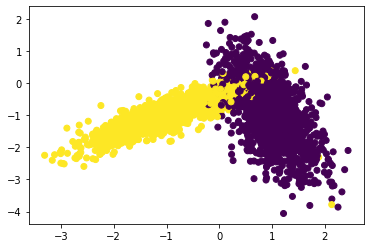

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
#colors = {0:'orange', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

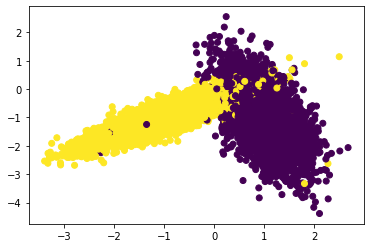

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [12]:
from sklearn.metrics import accuracy_score
def RandomSearch(x_train,y_train,classifier, params, folds=3):
    trainscores = []
    cvscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        cvscores_folds  = []
        dist = int(len(x_train)/folds) #here it divides len(x_train) into 3 equal fields
        count = 0
        for i in range(folds): #this for loop will run for 3 folds
            x_tr = []
            x_cv = []
            y_tr = []
            y_cv = []
            index = count+dist
            index_cv = list(range(count,index))#this will take 2.5k points for cv
           # print(len(index_cv))
            count = dist+count
           # print(count)
            total = list(range(len(x_train))) #total of all 7500 points
            #print(len(total))
            index_tr = set(total)-set(index_cv) #for train it will consider 7500-2500 = 5000 
            index_tr = list(index_tr)
            #print(len(index_tr))
            for i_cv in index_cv:
                x_cv.append(X_train[i_cv])
                y_cv.append(y_train[i_cv])
            for i_tr in index_tr:
                x_tr.append(X_train[i_tr])
                y_tr.append(y_train[i_tr])
            
            x_cv = np.array(x_cv)
            y_cv = np.array(y_cv)
            x_tr = np.array(x_tr)
            y_tr = np.array(y_tr)
            classifier.n_neighbors = k
            classifier.fit(x_tr,y_tr) #fits the module

            Y_predicted = classifier.predict(x_cv)
            cvscores_folds.append(accuracy_score(y_cv, Y_predicted))

            Y_predicted = classifier.predict(x_tr)
            trainscores_folds.append(accuracy_score(y_tr, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        cvscores.append(np.mean(np.array(cvscores_folds)))
    return trainscores,cvscores


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.56s/it]


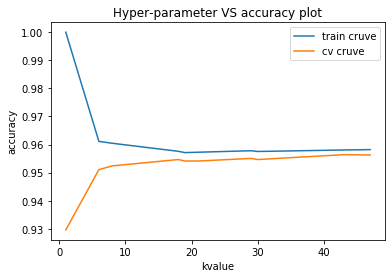

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
import numpy as np
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
pram = range(1,50) #it will take the range of values between  1-50

params = {'n_neighbors':np.sort(random.sample(pram,10))} #it will consider 10 values
folds = 3

trainscores,cvscores = RandomSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],cvscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel("kvalue")
plt.ylabel("accuracy")
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.59s/it]


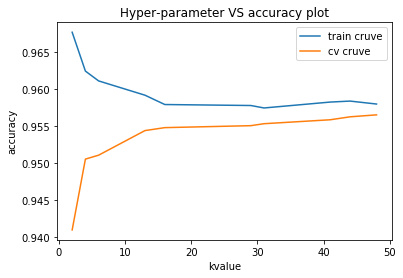

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
import numpy as np
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
pram = range(1,50)

params = {'n_neighbors':np.sort(random.sample(pram,10))}
folds = 3

trainscores,cvscores = RandomSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],cvscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel("kvalue")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [26]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

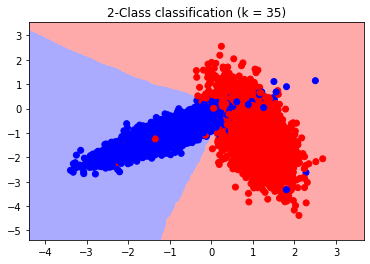

In [75]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 35)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

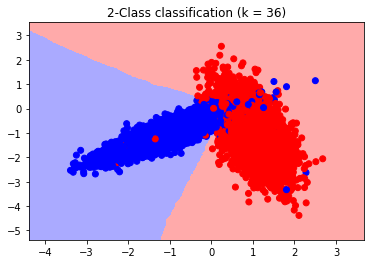

In [20]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 36)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

# observation:
since it is random search cv everytime i run seeing the variation while choosing the hyperparameter i had drawn 2 plots which i observed best hyperparameter i.e., k = 36 and k = 35